In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

## SVM Train

In [83]:
tr_features = pd.read_csv('revised_data.csv',
                 usecols=[1,3,5,6,7,8,10,11,12],
                 encoding='latin')
tr_output = pd.read_csv('revised_data.csv',
                 usecols=[2],
                 encoding='latin')  
tr_features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,0,22.000000,1,0,7.2500,0,0
1,2,1,1,38.000000,1,0,71.2833,1,1
2,3,3,1,26.000000,0,0,7.9250,0,0
3,4,1,1,35.000000,1,0,53.1000,2,0
4,5,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,7,0
887,888,1,1,19.000000,0,0,30.0000,145,0
888,889,3,1,26.043645,1,2,23.4500,0,0
889,890,1,0,26.000000,0,0,30.0000,146,1


In [94]:
te_features = pd.read_csv('revised_test.csv',
                 usecols=[1,2,4,5,6,7,9,10,11],
                 encoding='latin')
#te_features = te_features.dropna()
mean = te_features["Fare"].dropna().mean()
te_features["Fare"] = te_features["Fare"].fillna(mean)
te_output = pd.read_csv('submission_titanic.csv',
                 usecols=[1],
                 encoding='latin')
#te_output = te_output.drop(152)

In [91]:
svm=SVC(kernel='linear',C=20,gamma=0.05,random_state=200)
svm.fit(tr_features, tr_output.to_numpy().ravel())

SVC(C=20, gamma=0.05, kernel='linear', random_state=200)

In [96]:
#score=cross_val_predict(svm,te_features,te_output.to_numpy().ravel(),cv=10)
print(classification_report(svm.predict(te_features),te_output))
acc_svm=accuracy_score(svm.predict(te_features),te_output)
print(acc_svm)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       379
           1       0.24      0.97      0.39        39

    accuracy                           0.71       418
   macro avg       0.62      0.83      0.60       418
weighted avg       0.93      0.71      0.77       418

0.7105263157894737


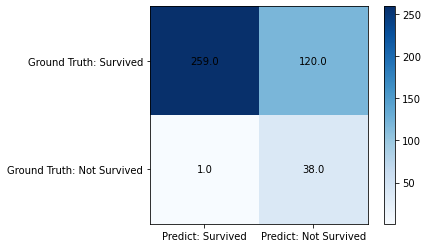

In [97]:
import matplotlib.pyplot as plt 
import matplotlib
fig, ax = plt.subplots()
confusion = confusion_matrix(svm.predict(te_features),te_output)
im = ax.imshow(confusion, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])
for (r, c), val in np.ndenumerate(confusion):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')


## Random Forest Classifier

In [98]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(tr_features, tr_output.to_numpy().ravel())

RandomForestClassifier(n_jobs=2, random_state=0)

In [99]:
acc_rfc=accuracy_score(clf.predict(te_features),te_output)
acc_rfc

0.7679425837320574

In [100]:
print(confusion_matrix(clf.predict(te_features),te_output))

[[238  75]
 [ 22  83]]


In [101]:
print(classification_report(clf.predict(te_features),te_output))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       313
           1       0.53      0.79      0.63       105

    accuracy                           0.77       418
   macro avg       0.72      0.78      0.73       418
weighted avg       0.82      0.77      0.78       418



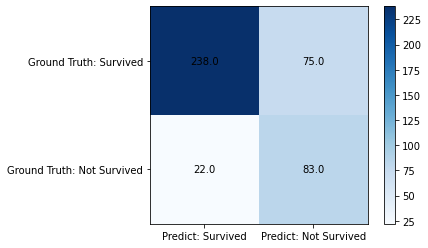

In [102]:
import matplotlib.pyplot as plt 
import matplotlib
fig, ax = plt.subplots()
confusion1 = confusion_matrix(clf.predict(te_features),te_output)
im1 = ax.imshow(confusion1, cmap=plt.cm.Blues)
ax.figure.colorbar(im1, ax=ax)
ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])
for (r, c), val in np.ndenumerate(confusion1):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')




#sns.heatmap(confusion_matrix(clf.predict(te_features),te_output), annot=True,cmap="Blues")

## Correlation Map

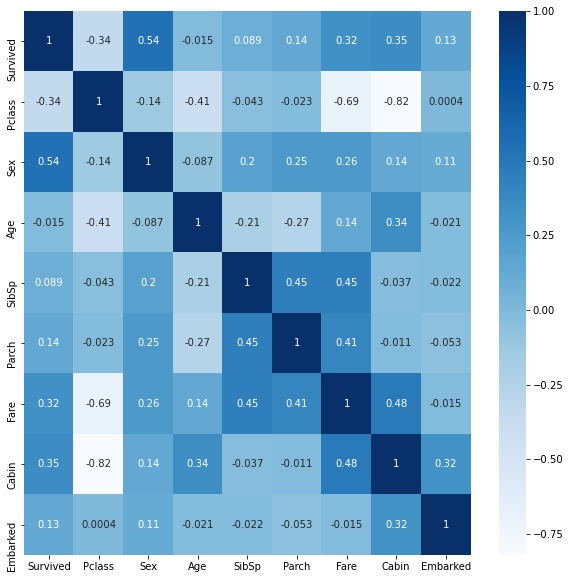

In [5]:
corr_dt = pd.read_csv('revised_data.csv',
                 usecols=[2,3,5,6,7,8,10,11,12],
                 encoding='latin')


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_dt.corr(method='spearman'),annot=True,cmap="Blues")
plt.savefig('out.png')